<a href="https://colab.research.google.com/github/Hong-gi-young/Projects/blob/main/BTS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.데이터 준비

## 1-1 폴더 생성

In [ ]:
#library import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os,re
from PIL import Image
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cur_dir=os.getcwd()
cur_dir

'/content'

In [ ]:
#directory 설정
cur_dir=os.getcwd()
data_dir=os.path.join(cur_dir,"drive")
data_dir=os.path.join(data_dir,'MyDrive')
data_dir=os.path.join(data_dir,'BTS')
image_dir=os.path.join(data_dir,'image_BTS')

## 1-2 RGB채널만 추출

In [ ]:
#image file 수 확인
image_files=[fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1]=='.jpg']
print(len(image_files))

7649


In [ ]:
# image를 읽은 후 채널이 3이 아닌 image는 삭제
for image_file in image_files:
  image_path= os.path.join(image_dir,image_file) #이미지 경로와 파일을 join
  image=Image.open(image_path)  #join한 객체를 open
  image_mode= image.mode  #몇 채널인지 mode를 통해서 확인
  
  #RGB가 아닌 것들은 삭제

  if image_mode != 'RGB':  
    print(image_file, image.mode)
    image= np.array(image)
    print(image.shape)
    os.remove(image_path)  

In [ ]:
# 삭제 후 image file 수 확인
image_files=[fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1]=='.jpg']
print(len(image_files))

7649


##1-3 BTS 멤버 Class 추출

In [ ]:
#번호 삭제 및 클래스만 뽑기
class_list=set() #중복제거 기능도 포함
for image_file in image_files:
  file_name=os.path.splitext(image_file)[0]
  class_name=re.sub("_\d+","",file_name)  # _(언더바) 와 숫자가 하나 이상인 것들은 공백으로 변경
  class_list.add(class_name)  #set 함수에 데이터 넣기
class_list=list(class_list)
print(len(class_list))

7


In [ ]:
#BTS 멤버 확인
class_list.sort()
class_list

['김남준', '민윤기', '뷔', '정국', '제이홉', '지민', '진']

In [ ]:
class_list[5]

'지민'

In [ ]:
#클래에 인덱스를 부여 해서 인데스를 통한 BTS멤버 search , 키:값->tfrecord에서 label로 활용
class2_idx={cls:idx for idx,cls in enumerate(class_list)}
class2_idx

{'김남준': 0,
 '민윤기': 1,
 '뷔': 2,
 '정국': 3,
 '제이홉': 4,
 '지민': 5,
 '진': 6}

In [ ]:
class2_idx['진']

6

##1-4 train,val 폴더로 이미지 파일 복사

In [ ]:
#train,validation directory 생성
train_dir= os.path.join(data_dir,"train")
validation_dir=os.path.join(data_dir,"validation")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir,exist_ok=True)

In [ ]:
image_files.sort()
image_files[:10]

['김남준_1.jpg',
 '김남준_10.jpg',
 '김남준_100.jpg',
 '김남준_1000.jpg',
 '김남준_1003.jpg',
 '김남준_1004.jpg',
 '김남준_1005.jpg',
 '김남준_1006.jpg',
 '김남준_1007.jpg',
 '김남준_1008.jpg']

## 1-5 각 클래스 別 7:3 훈련/검증 데이터 분리

In [ ]:
cnt_kim=0
cnt_min=0
cnt_v=0
cnt_jung=0
cnt_jin=0
cnt_ji=0
cnt_jhope=0

for image_file in image_files:
  file_name=os.path.splitext(image_file)[0]
  class_name=re.sub("_\d+","",file_name)
  
  if class_name=="김남준":
    cnt_kim+=1
  elif class_name=="민윤기":
    cnt_min+=1
  elif class_name=="뷔":
    cnt_v+=1
  elif class_name=="정국":
    cnt_jung+=1
  elif class_name=="진":
    cnt_jin+=1
  elif class_name=="지민":
    cnt_ji+=1
  else:
    cnt_jhope+=1

print("김남준:{}개, 민윤기:{}개, 뷔:{}개,정국:{}개,진:{}개,지민:{}개,제이홉:{}개".format(cnt_kim,cnt_min,cnt_v,cnt_jung,cnt_jin,cnt_ji,cnt_jhope))

김남준:962개, 민윤기:1146개, 뷔:1029개,정국:1168개,진:1077개,지민:1159개,제이홉:1108개


In [ ]:
type(cnt_jung)

int

In [ ]:
#각 클래스의 7:3비율로 train,validataion 분리하는 function
def data_shutil(cnt_BTS,name):
  import shutil
  cnt=0
  for image_file in image_files:
    file_name=os.path.splitext(image_file)[0]
    class_name=re.sub("_\d+","",file_name)

    if class_name==name:
      if cnt<= cnt_BTS*0.7:   
        cpath=train_dir
        cnt+=1
      else:
        cpath=validation_dir
      image_path=os.path.join(image_dir, image_file) #원본이미지가 있는 경로
      shutil.copy(image_path,cpath) #image_path의 이미지 정보를 cpath에 복사
    else:
      pass
      

In [ ]:
data_shutil(cnt_kim,'김남준')
data_shutil(cnt_min,'민윤기')
data_shutil(cnt_v,'뷔')
data_shutil(cnt_jung,"정국")
data_shutil(cnt_jin,'진')
data_shutil(cnt_ji,"지민")
data_shutil(cnt_jhope,"제이홉")


In [ ]:
train_images=os.listdir(train_dir)
val_images=os.listdir(validation_dir)

In [ ]:
print(len(train_images),len(val_images))

5358 2291


In [ ]:
train_images[:5]

['김남준_1.jpg',
 '김남준_10.jpg',
 '김남준_100.jpg',
 '김남준_1000.jpg',
 '김남준_1003.jpg']

In [ ]:
val_images[:5]

['김남준_638.jpg',
 '김남준_639.jpg',
 '김남준_640.jpg',
 '김남준_641.jpg',
 '김남준_642.jpg']

#2.TFRecord File 만들기

In [ ]:
IMG_SIZE=224

## 2-1 train,val의 TFRecord 폴더 및 경로설정

In [ ]:
# TFRecord 저장할 directory와 file 경로 설정
#저장할 tfrecodr 폴더 만들기
tfr_dir=os.path.join(data_dir,'tfrecord')  
os.makedirs(tfr_dir, exist_ok=True)

#tfr파일 저장경로 설정
tfr_train_dir=os.path.join(tfr_dir,"train.tfr")
tfr_val_dir=os.path.join(tfr_dir,"val.tfr")

In [ ]:
## TFRecord writer 생성
writer_train=tf.io.TFRecordWriter(tfr_train_dir)
writer_val=tf.io.TFRecordWriter(tfr_val_dir)

In [ ]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.
#tensorflow 공식 홈페이지 내용과 동일

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

##2-2 Data->TFRecord Data 변환

In [ ]:
# Training data로 tfrecord 만들기
#https://www.tensorflow.org/tutorials/load_data/tfrecord
n_train=0

train_files= os.listdir(train_dir)
for train_file in train_files:
  train_path= os.path.join(train_dir, train_file) #경로+파일명

  #image를 바이트로 변환-> 바이트로 한줄 줄세우기: 직렬화
  image= Image.open(train_path)
  image=image.resize((IMG_SIZE,IMG_SIZE))
  bimage= image.tobytes()

  #각 BTS멤버이름의 인덱스를 int64로 변환 - 레이블생성
  file_name= os.path.splitext(train_file)[0] #지민_44
  class_name=re.sub("_\d+","",file_name)
  class_num=class2_idx[class_name]

  example= tf.train.Example(features=tf.train.Features(feature={
      "image":_bytes_feature(bimage),
      "cls_num": _int64_feature(class_num)
  }))
  #writer_train=tfr_train_dir,  SerializeToString:이진 문자열로 직렬화
                                                 #이진 문자열: image,음성, 혼합미디어와 같은 데이터 저장에 유리
                                                 #일반 문자열: 텍스트 저장
  writer_train.write(example.SerializeToString())
  n_train+=1

writer_train.close()
print(n_train)


5358


In [ ]:
# Validation data로 tfrecord 만들기
n_val = 0

val_files = os.listdir(validation_dir)
for val_file in val_files:
  val_path = os.path.join(validation_dir, val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(val_file)[0] #Bangal_101
  class_name = re.sub('_\d+', '', file_name)
  class_num = class2_idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1

writer_val.close()
print(n_val)

2291


In [ ]:
!ls -l $tfr_dir

total 1124859
-rw------- 1 root root 806855862 Dec 29 03:35 train.tfr
-rw------- 1 root root 344999399 Dec 29 03:36 val.tfr


#3.Classification

In [ ]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 20
N_BATCH = 30
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH))

##3-1 tfrecord file을 data로 parsing

In [ ]:
# tfrecord file을 data로 parsing해주는 function
def _parse_function(tfrecord_serialized):
  features={
      'image':tf.io.FixedLenFeature([], tf.string),
      'cls_num':tf.io.FixedLenFeature([], tf.int64)
  }
  parsed_features= tf.io.parse_single_example(tfrecord_serialized, features)

  image=tf.io.decode_raw(parsed_features['image'], tf.uint8)
  image=tf.reshape(image, [IMG_SIZE,IMG_SIZE,3])
  image=tf.cast(image, tf.float32)/255.

  label= tf.cast(parsed_features['cls_num'], tf.int64)

  return image, label

##3-2 Dataset 생성

In [ ]:
# train dataset 만들기
train_dataset= tf.data.TFRecordDataset(tfr_train_dir)

#https://www.tensorflow.org/guide/data_performance
#tf.data.experimental.AUTOTUNE
#->tf.data 런타임이 실행 시에 동적으로 값을 조정하도록 만듭니다.
#병렬처리 수준은 num_parallel_calls 매개변수에 의해 지정될 수 있습니다.

train_dataset=train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset=train_dataset.shuffle(N_TRAIN).prefetch(
tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

In [ ]:
# validation dataset 만들기
val_dataset= tf.data.TFRecordDataset(tfr_val_dir)
val_dataset=val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset=val_dataset.batch(N_BATCH).repeat()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4535 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4364 missing from current font.
  font.set_text(s

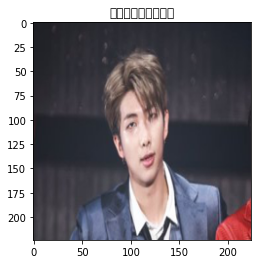

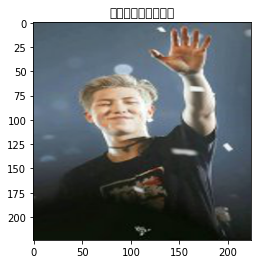

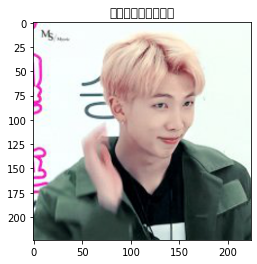

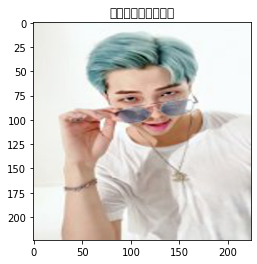

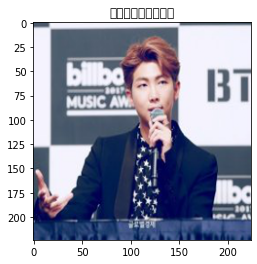

In [ ]:
#각 배치의 첫번째 이미지 확인
for image,label in train_dataset.take(5):
  plt.imshow(image[0])
  title= class_list[label[0].numpy()]
  plt.title(title)
  plt.show();

##3-3 model 구성 및 compile

In [ ]:
#model 구성
#Maxpool2D를 쓰는 이유:이유는 결국 pooling을 하는 이유와 같다. convolution 계산결과인 feature maps에서 filter 마다 특징을 찾아내는 것이다.
#feature maps에서 큰 숫자는 그 filter가 찾아내고자하는 특징에 가깝다는 의미 이기 때문이다.
#vanilla_CNN-> Conv2D,MaxPool2D 한번씩 반복
def create_model():
  model=keras.Sequential()
  model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same'))
  model.add(keras.layers.MaxPool2D(padding='same'))
  model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(keras.layers.MaxPool2D(padding='same'))
  model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))  
  model.add(keras.layers.MaxPool2D(padding='same'))
  model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
  model.add(keras.layers.MaxPool2D(padding='same'))
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
  model.add(keras.layers.MaxPool2D(padding='same'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(1024, activation='relu'))
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
  return model

In [ ]:
#컴파일
model= create_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

## 3-4.model fit  1차 결과

In [ ]:
#model fit
history=model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
178/178 [==============================] - 21s 76ms/step - loss: 1.9415 - accuracy: 0.1662 - val_loss: 1.9118 - val_accuracy: 0.2200
Epoch 2/20
178/178 [==============================] - 16s 72ms/step - loss: 1.8825 - accuracy: 0.2327 - val_loss: 1.8035 - val_accuracy: 0.2759
Epoch 3/20
178/178 [==============================] - 15s 72ms/step - loss: 1.7888 - accuracy: 0.2811 - val_loss: 1.7709 - val_accuracy: 0.3090
Epoch 4/20
178/178 [==============================] - 15s 72ms/step - loss: 1.7070 - accuracy: 0.3212 - val_loss: 1.7468 - val_accuracy: 0.3165
Epoch 5/20
178/178 [==============================] - 16s 73ms/step - loss: 1.5624 - accuracy: 0.3992 - val_loss: 1.7840 - val_accuracy: 0.3300
Epoch 6/20
178/178 [==============================] - 16s 73ms/step - loss: 1.3908 - accuracy: 0.4873 - val_loss: 1.7550 - val_accuracy: 0.3352
Epoch 7/20
178/178 [==============================] - 16s 74ms/step - loss: 1.1567 - accuracy: 0.5865 - val_loss: 1.8160 - val_accuracy:

##3-5 loss/acc 그래프

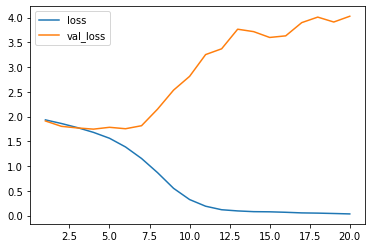

In [ ]:
epochs=range(1,len(history.history['loss'])+1)
plt.plot(epochs,history.history['loss'], label='loss')
plt.plot(epochs,history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

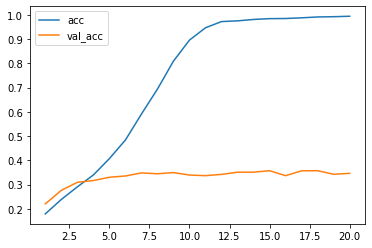

In [ ]:
plt.plot(epochs,history.history['accuracy'], label='acc')
plt.plot(epochs,history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

##3-6 새로운 image로 테스트

In [ ]:
image=Image.open('정국.jpg')
image=image.resize((IMG_SIZE,IMG_SIZE))
image=np.array(image)
image=image/255.

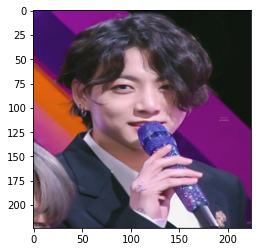

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image =np.reshape(image,(1,224,224,3))

In [ ]:
prediction = model.predict(image)
prediction.shape

(1, 7)

In [ ]:
prediction

array([[2.0122231e-04, 4.3860786e-03, 2.1326873e-01, 3.6892629e-01,
        6.0113170e-04, 4.1261613e-01, 3.8171811e-07]], dtype=float32)

In [ ]:
class_list

['김남준', '민윤기', '뷔', '정국', '제이홉', '지민', '진']

In [ ]:
#7개의 클래스중 가장 높은 확률이 어떤건지 확인
pred_class= np.argmax(prediction, axis=-1) 
pred_class

array([5])

In [ ]:
class_list[int(pred_class)]

'지민'

##3-7 결론

이전의 시도에서는 각 클래스를 일괄적으로 800개씩 train으로 사용했습니다.
그 결과로, accuracy와 val_accuracy가 과적합을 보이지 않으며 90%이상의 정확도를 보였습니다. 하지만 새로운 이미지로 테스트 했을시, 예측 정확도가 대략 28%를 보였습니다. 데이터 학습 시 일괄적으로 적용한 800개가 학습에 오류를 일으킨게 아닐까 생각되어서 각 클래스 別 7:3으로 새로 나누어 수행했습니다. 그 결과 val_accuracy 30%중반을 기록했지만 그래프에서 과적합 경향을 보였습니다. 과적합을 피하기 위해서, 데이터 증식 이나 batch normalzation 같은 방법을 적용할 필요가 보입니다. 

#4.Classsification- 데이터 증식

In [ ]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 20
N_BATCH = 30
IMG_SIZE = 224
learning_rate = 0.0001

In [ ]:
import shutil
cnt=0
previous_class = ''

#각 BTS멤버 훈련용 폴더 생성
train_data_dir=os.path.join(data_dir,"train_new")
os.mkdir(train_data_dir)

train_kim_dir=os.path.join(train_data_dir,"김남준")
train_min_dir=os.path.join(train_data_dir,"민윤기")
train_ji_dir=os.path.join(train_data_dir,"지민")
train_jhope_dir=os.path.join(train_data_dir,"제이홉")
train_v_dir=os.path.join(train_data_dir,"뷔")
train_jin_dir=os.path.join(train_data_dir,"진")
train_jung_dir=os.path.join(train_data_dir,"정국")

os.mkdir(train_kim_dir)
os.mkdir(train_min_dir)
os.mkdir(train_ji_dir)
os.mkdir(train_jhope_dir)
os.mkdir(train_v_dir)
os.mkdir(train_jin_dir)
os.mkdir(train_jung_dir)

#각 BTS멤버 검증용 폴더 생성
val_data_dir=os.path.join(data_dir,"validation_new")
os.mkdir(val_data_dir)

val_kim_dir=os.path.join(val_data_dir,"김남준")
val_min_dir=os.path.join(val_data_dir,"민윤기")
val_ji_dir=os.path.join(val_data_dir,"지민")
val_jhope_dir=os.path.join(val_data_dir,"제이홉")
val_v_dir=os.path.join(val_data_dir,"뷔")
val_jin_dir=os.path.join(val_data_dir,"진")
val_jung_dir=os.path.join(val_data_dir,"정국")

os.mkdir(val_kim_dir)
os.mkdir(val_min_dir)
os.mkdir(val_ji_dir)
os.mkdir(val_jhope_dir)
os.mkdir(val_v_dir)
os.mkdir(val_jin_dir)
os.mkdir(val_jung_dir)


In [ ]:

for image_file in sorted(image_files):
  file_name=os.path.splitext(image_file)[0]
  class_name=re.sub("_\d+","",file_name)
  class_name=str(class_name)

  if class_name=="김남준":
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_kim*0.7:   
      cpath=train_kim_dir
    else:
      cpath=val_kim_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name

  elif class_name=='민윤기':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_min*0.7:   
      cpath=train_min_dir
    else:
      cpath=val_min_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  elif class_name=='지민':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_ji*0.7:   
      cpath=train_ji_dir
    else:
      cpath=val_ji_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name 

  elif class_name=='제이홉':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_jhope*0.7:   
      cpath=train_jhope_dir
    else:
      cpath=val_jhope_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  elif class_name=='뷔':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_v*0.7:   
      cpath=train_v_dir
    else:
      cpath=val_v_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  elif class_name=='진':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_jin*0.7:   
      cpath=train_jin_dir
    else:
      cpath=val_jin_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  else: 
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_jung*0.7:   
      cpath=train_jung_dir
    else:
      cpath=val_jung_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.5,
    zoom_range=0.2,
    horizontal_flip= True
)

In [ ]:
val_datagen=ImageDataGenerator(
    rescale=1./255
)

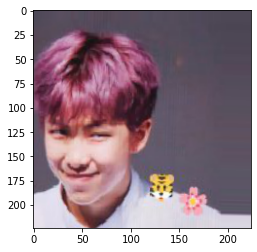

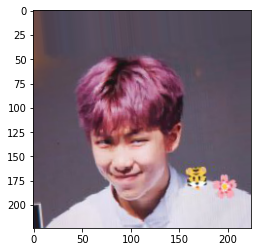

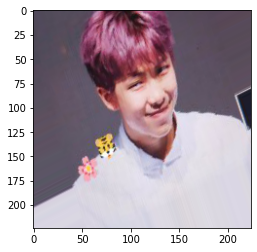

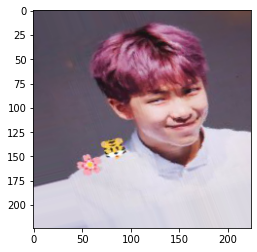

In [ ]:
from keras.preprocessing import image
fnames= sorted([os.path.join(train_dir, fname) for fname in os.listdir(train_dir)])
img_path=fnames[2]
img=image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE))
images=image.img_to_array(img)  #이미지를 NumPy 배열로 변환
images=images.reshape((1,)+images.shape)   #4차원 배열로 reshape, 사진한장이므로 batch=1로 설정

i=0
for batch in train_datagen.flow(images, batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))  
  i+=1
  if i %4==0:
    break
plt.show()

In [ ]:
#model 구성
def create_model2():
  model=keras.Sequential()
  model.add(keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(IMG_SIZE,IMG_SIZE,3), padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))  
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.ReLU())
  model.add(keras.layers.MaxPool2D())
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(512, activation='relu'))
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
  return model

In [ ]:
model=create_model2()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 112, 112, 64)     

In [ ]:

train_generator= train_datagen.flow_from_directory(
    train_data_dir,  #타깃 디렉토리
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=N_BATCH,
    class_mode="sparse"
)

val_generator= val_datagen.flow_from_directory(
    val_data_dir,  #타깃 디렉토리
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=N_BATCH,
    class_mode="sparse"
)

Found 5358 images belonging to 7 classes.
Found 2291 images belonging to 7 classes.


In [ ]:
## Hyper Parameters
N_TRAIN = 5358 
N_VAL = 2291
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH))

In [ ]:
from keras.callbacks import EarlyStopping
call_early=EarlyStopping(
    monitor='val_accuracy',
    patience=7
)

In [ ]:
#compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## 4-1.model fit  2차 결과

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=N_EPOCHS,
    validation_data= val_generator,
    validation_steps=validation_steps
    # callbacks=([call_early])
)

Epoch 1/20
178/178 [==============================] - 72s 397ms/step - loss: 1.9232 - accuracy: 0.1795 - val_loss: 1.8983 - val_accuracy: 0.2204
Epoch 2/20
178/178 [==============================] - 71s 397ms/step - loss: 1.9222 - accuracy: 0.1745 - val_loss: 1.9068 - val_accuracy: 0.2069
Epoch 3/20
178/178 [==============================] - 70s 394ms/step - loss: 1.9270 - accuracy: 0.1833 - val_loss: 1.8959 - val_accuracy: 0.2270
Epoch 4/20
178/178 [==============================] - 70s 390ms/step - loss: 1.9256 - accuracy: 0.1862 - val_loss: 1.8854 - val_accuracy: 0.2204
Epoch 5/20
178/178 [==============================] - 69s 388ms/step - loss: 1.9071 - accuracy: 0.1937 - val_loss: 1.8877 - val_accuracy: 0.2204
Epoch 6/20
178/178 [==============================] - 70s 391ms/step - loss: 1.8950 - accuracy: 0.2025 - val_loss: 1.8584 - val_accuracy: 0.2370
Epoch 7/20
178/178 [==============================] - 69s 389ms/step - loss: 1.9076 - accuracy: 0.1934 - val_loss: 1.8760 - val_ac

##4-2 loss/acc 그래프

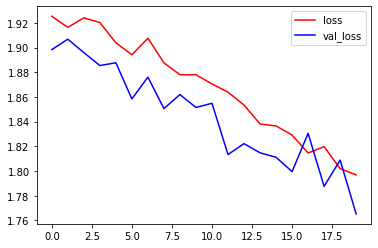

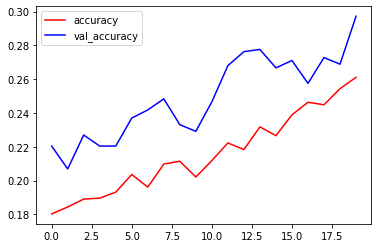

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c= "r",label='loss')
plt.plot(history.history['val_loss'], c= "b",label='val_loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], c= "r",label='accuracy')
plt.plot(history.history['val_accuracy'], c= "b",label='val_accuracy')
plt.legend()
plt.show()


##4-3 새로운 image로 테스트

In [ ]:
image=Image.open('지민.jpg')
image=image.resize((IMG_SIZE,IMG_SIZE))
image=np.array(image)
image=image/255.

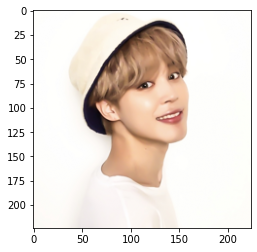

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image =np.reshape(image,(1,224,224,3))

In [ ]:
prediction = model.predict(image)
prediction.shape

(1, 7)

In [ ]:
#7개의 클래스중 가장 높은 확률이 어떤건지 확인
pred_class= np.argmax(prediction, axis=-1) 
pred_class


array([6])

In [ ]:
class_list[int(pred_class)]

'진'

##4-4 결론

4-3 결론에서 발생했던 과적합 현상은 개선이 되었으며 그래프에서 loss는 같이 감소하고
accuracy는 같이 증가 하는 것으로 볼때 epoch를 늘리면 정확도가 더욱 개선될 것임을 알수가 있다. 
하지만 정확도의 출발점이 낮은 점으로 보았을때, 괄목할만한 정확도는 나오지 않을 가능성이 클것이라 예상된다. imagenet는 개,고양이 등 사전학습된 모델을 제공하는데, 그중에서 VGG16 모델을 사용하여 다른 모델들과의 정확도를 비교 해보자.

# 5.VGG16 사전학습을 이용한 Classification 

In [ ]:
from keras.applications import VGG16

v16= VGG16(weights='imagenet',
           include_top=False, #fully connected Dense를 따로 추가 해야하므로 False로 설정->imagenet의 fully connected Dense를 사용하지 않는다.
           input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
v16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
import shutil
cnt=0
previous_class = ''

#각 BTS멤버 훈련용 폴더 생성
train_data_dir=os.path.join(data_dir,"train_new")
os.mkdir(train_data_dir)

train_kim_dir=os.path.join(train_data_dir,"김남준")
train_min_dir=os.path.join(train_data_dir,"민윤기")
train_ji_dir=os.path.join(train_data_dir,"지민")
train_jhope_dir=os.path.join(train_data_dir,"제이홉")
train_v_dir=os.path.join(train_data_dir,"뷔")
train_jin_dir=os.path.join(train_data_dir,"진")
train_jung_dir=os.path.join(train_data_dir,"정국")

os.mkdir(train_kim_dir)
os.mkdir(train_min_dir)
os.mkdir(train_ji_dir)
os.mkdir(train_jhope_dir)
os.mkdir(train_v_dir)
os.mkdir(train_jin_dir)
os.mkdir(train_jung_dir)

#각 BTS멤버 검증용 폴더 생성
val_data_dir=os.path.join(data_dir,"validation_new")
os.mkdir(val_data_dir)

val_kim_dir=os.path.join(val_data_dir,"김남준")
val_min_dir=os.path.join(val_data_dir,"민윤기")
val_ji_dir=os.path.join(val_data_dir,"지민")
val_jhope_dir=os.path.join(val_data_dir,"제이홉")
val_v_dir=os.path.join(val_data_dir,"뷔")
val_jin_dir=os.path.join(val_data_dir,"진")
val_jung_dir=os.path.join(val_data_dir,"정국")

os.mkdir(val_kim_dir)
os.mkdir(val_min_dir)
os.mkdir(val_ji_dir)
os.mkdir(val_jhope_dir)
os.mkdir(val_v_dir)
os.mkdir(val_jin_dir)
os.mkdir(val_jung_dir)


In [ ]:

for image_file in sorted(image_files):
  file_name=os.path.splitext(image_file)[0]
  class_name=re.sub("_\d+","",file_name)
  class_name=str(class_name)

  if class_name=="김남준":
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_kim*0.7:   
      cpath=train_kim_dir
    else:
      cpath=val_kim_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name

  elif class_name=='민윤기':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_min*0.7:   
      cpath=train_min_dir
    else:
      cpath=val_min_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  elif class_name=='지민':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_ji*0.7:   
      cpath=train_ji_dir
    else:
      cpath=val_ji_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name 

  elif class_name=='제이홉':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_jhope*0.7:   
      cpath=train_jhope_dir
    else:
      cpath=val_jhope_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  elif class_name=='뷔':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_v*0.7:   
      cpath=train_v_dir
    else:
      cpath=val_v_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  elif class_name=='진':
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_jin*0.7:   
      cpath=train_jin_dir
    else:
      cpath=val_jin_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name  

  else: 
    if class_name == previous_class:
      cnt+=1
    else:
      cnt=0
    if cnt<= cnt_jung*0.7:   
      cpath=train_jung_dir
    else:
      cpath=val_jung_dir
    image_path=os.path.join(image_dir, image_file) 
    shutil.copy(image_path,cpath)
    previous_class=class_name 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.5,
    zoom_range=0.2,
    horizontal_flip= True
)

In [ ]:
val_datagen=ImageDataGenerator(
    rescale=1./255
)

##5-1 VGG16 model 구성 및 compile

In [ ]:
from keras import models
model=models.Sequential()
model.add(v16)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))

In [ ]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 20
N_BATCH = 30
IMG_SIZE = 224
learning_rate = 0.0001
N_TRAIN = 5358 
N_VAL = 2291
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH))

In [ ]:

train_generator= train_datagen.flow_from_directory(
    train_data_dir,  #타깃 디렉토리
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=N_BATCH,
    class_mode="sparse"
)

val_generator= val_datagen.flow_from_directory(
    val_data_dir,  #타깃 디렉토리
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=N_BATCH,
    class_mode="sparse"
)

Found 5358 images belonging to 7 classes.
Found 2291 images belonging to 7 classes.


In [ ]:
from keras.callbacks import EarlyStopping
call_early=EarlyStopping(
    monitor='val_accuracy',
    patience=5
)

In [ ]:
from keras import optimizers

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['accuracy']
)

## 5-2 moelf fit 3차 결과

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=N_EPOCHS,
    validation_data= val_generator,
    validation_steps=validation_steps,
    callbacks=([call_early])
)

Epoch 1/20
178/178 [==============================] - 106s 564ms/step - loss: 1.9553 - accuracy: 0.1771 - val_loss: 1.6887 - val_accuracy: 0.3553
Epoch 2/20
178/178 [==============================] - 98s 546ms/step - loss: 1.7059 - accuracy: 0.3286 - val_loss: 1.4688 - val_accuracy: 0.4531
Epoch 3/20
178/178 [==============================] - 98s 545ms/step - loss: 1.5917 - accuracy: 0.3851 - val_loss: 1.4558 - val_accuracy: 0.4505
Epoch 4/20
178/178 [==============================] - 98s 546ms/step - loss: 1.4684 - accuracy: 0.4428 - val_loss: 1.4052 - val_accuracy: 0.4692
Epoch 5/20
178/178 [==============================] - 98s 548ms/step - loss: 1.3500 - accuracy: 0.4955 - val_loss: 1.3425 - val_accuracy: 0.4989
Epoch 6/20
178/178 [==============================] - 98s 548ms/step - loss: 1.2537 - accuracy: 0.5325 - val_loss: 1.2474 - val_accuracy: 0.5386
Epoch 7/20
178/178 [==============================] - 98s 547ms/step - loss: 1.1651 - accuracy: 0.5700 - val_loss: 1.2639 - val_a

##5-3 loss/acc 그래프

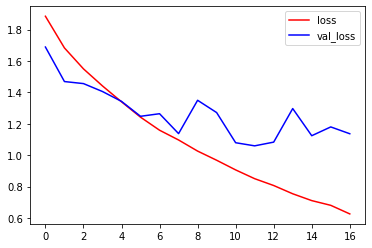

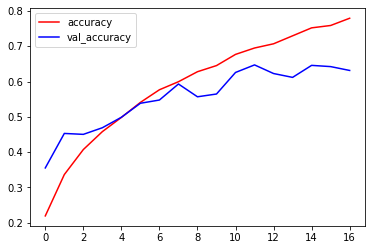

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], c= "r",label='loss')
plt.plot(history.history['val_loss'], c= "b",label='val_loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], c= "r",label='accuracy')
plt.plot(history.history['val_accuracy'], c= "b",label='val_accuracy')
plt.legend()
plt.show()


## 5-4 새로운 image로 테스트

In [ ]:
image=Image.open('지민.jpg')
image=image.resize((IMG_SIZE,IMG_SIZE))
image=np.array(image)
image=image/255.

<function matplotlib.pyplot.show>

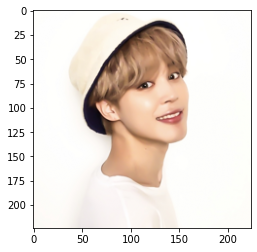

In [ ]:
plt.imshow(image)
plt.show

In [ ]:
image=np.resize(image, (1,IMG_SIZE,IMG_SIZE,3))
image.shape

(1, 224, 224, 3)

In [ ]:
prediction=model.predict(image)
prediction.shape

(1, 7)

In [ ]:
prediction=np.argmax(prediction)
prediction

0

In [ ]:
class_list[prediction]

'김남준'

## 5-5 결론

VGG16 사전학습을 이용한 결과 model fit 1,2차 정확도 보다 월등한 정확도를 보여준다. epoch 수를 늘려봐야 정확하겠지만 대략 11epoch에서 loss값의 감소 추세가 꺽여졌고 정확도는 증가추세가 멈추었다. 이를 봤을때 과적합의 가능성이 있으므로 이 모델의 정확도는 60%중반으로 볼수있겠다. 